In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [2]:
boston = pd.read_csv('Boston.csv')

In [3]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

In [5]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [6]:
print(boston.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')


<h1>Simple Linear Regression</h1>

Coefficients: [-0.95004935]
Intercept: 34.55384087938311
rsquared: 0.5441462975864799


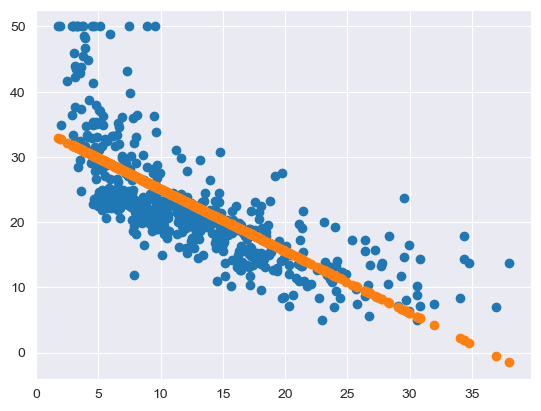

In [7]:
y=boston["medv"].values
x=boston["lstat"].values.reshape(-1,1)
reg=LinearRegression()
reg.fit(x,y)
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
print("rsquared:", reg.score(x,y))
fig, ax = plt.subplots()
ax.scatter(boston["lstat"],boston["medv"])
ax.scatter(boston["lstat"],reg.coef_[0]*boston["lstat"]+reg.intercept_)

<h1>Multiple Linear Regression</h1>

In [8]:
y=boston["medv"].values
x=boston[["lstat","age"]].values
reg=LinearRegression()
reg.fit(x,y)
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
print("rsquared:", reg.score(x,y))

Coefficients: [-1.03206856  0.03454434]
Intercept: 33.22276053179291
rsquared: 0.5512689379421003


<h1>Interaction Terms</h1>

In [9]:
y=boston["medv"]
x=boston[["lstat","age"]].copy()
x["lstat:age"]=x["lstat"]*x["age"]
reg=LinearRegression()
reg.fit(x,y)
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
print("rsquared:", reg.score(x,y))

Coefficients: [-1.39211684e+00 -7.20859509e-04  4.15595185e-03]
Intercept: 36.088535934612906
rsquared: 0.5557265450993936


<h1>Non-linear Transformations of the Predictors</h1>

In [10]:
y=boston["medv"]
age = boston["age"].values.reshape((-1,1))
poly = PolynomialFeatures(degree=2,include_bias=False)
lstat_poly = poly.fit_transform(boston["lstat"].values.reshape((-1,1)))
x=np.concatenate((lstat_poly,age),axis=1)
reg=LinearRegression()
reg.fit(x,y)
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
print("rsquared:", reg.score(x,y))

Coefficients: [-2.68830043  0.04948867  0.07025447]
Intercept: 41.28853740335009
rsquared: 0.6683791720749932


<h1>Qualitative Predictors</h1>

In [11]:
carseats = pd.read_csv('Carseats.csv')
carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [12]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [13]:
x=carseats.drop("Sales",axis=1,inplace=False)
x["ShelveLoc[Good]"] = x[x["ShelveLoc"]=="Good"]["ShelveLoc"]
x["ShelveLoc[Medium]"] = x[x["ShelveLoc"]=="Medium"]["ShelveLoc"]
x.drop("ShelveLoc",axis=1,inplace=True)
x["ShelveLoc[Good]"].fillna(value=0,inplace=True)
x["ShelveLoc[Medium]"].fillna(value=0,inplace=True)
x["ShelveLoc[Good]"].replace("Good",1,inplace=True)
x["ShelveLoc[Medium]"].replace("Medium",1,inplace=True)
x["Urban"].replace("Yes",1,inplace=True)
x["Urban"].replace("No",0,inplace=True)
x["US"].replace("Yes",1,inplace=True)
x["US"].replace("No",0,inplace=True)
y=carseats["Sales"]
reg=LinearRegression()
reg.fit(x,y)
print("Coefficients:", list(reg.coef_))
print("Intercept:", reg.intercept_)
print("rsquared:", reg.score(x,y))

Coefficients: [0.09281534211623992, 0.01580283629937393, 0.12309508858340594, 0.0002078770650568093, -0.09535791882165326, -0.046045162960552125, -0.02110183886822231, 0.12288639653504653, -0.1840928245549139, 4.850182711018565, 1.9567148061875386]
Intercept: 5.660623063125368
rsquared: 0.8734133434127012
